<a href="https://colab.research.google.com/github/Wuwei0-1/-github-workflows-lucid_dream.-yml/blob/main/Dodeca_erhu_song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Synthesizing Erhu audio...
Song Duration: 35.00s | Frames: 875
To hear the music, ensure 'pygame' is installed and your environment supports audio playback, or play 'erhu_wu_wei.wav' manually.
Starting visualizer...


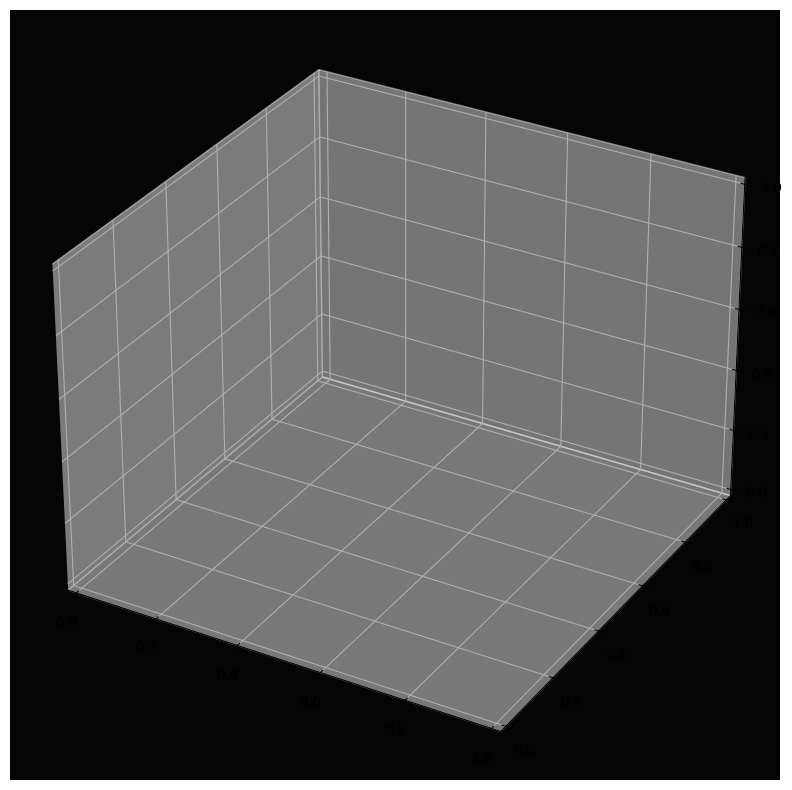

In [ ]:
!pip install numpy matplotlib scipy pygame

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.io.wavfile import write
import os
import sys

# --- CONFIGURATION ---
# Animation settings
FPS = 25
INTERVAL = int(1000 / FPS)  # ms per frame

# Audio settings
SAMPLE_RATE = 44100
MASTER_VOLUME = 0.5
AUDIO_FILENAME = "erhu_wu_wei.wav"

# --- PART 1: AUDIO SYNTHESIS (The Erhu) ---
def generate_erhu_tone(frequency, duration):
    t = np.linspace(0, duration, int(SAMPLE_RATE * duration), endpoint=False)

    # 1. Vibrato (The Soul)
    vibrato_depth = 0.003
    vibrato_rate = 5.5
    vibrato = 1 + vibrato_depth * np.sin(2 * np.pi * vibrato_rate * t)
    phase = 2 * np.pi * np.cumsum(frequency * vibrato) / SAMPLE_RATE

    # 2. Timbre (Harmonic Stacking)
    signal = 1.0 * np.sin(phase)           # Fundamental
    signal += 0.5 * np.sin(2 * phase)      # Octave
    signal += 0.3 * np.sin(3 * phase)      # Fifth
    signal += 0.1 * np.sin(5 * phase)      # High Buzz

    # 3. Envelope (Soft Attack/Release)
    attack = int(0.15 * SAMPLE_RATE)
    release = int(0.2 * SAMPLE_RATE)
    envelope = np.ones(len(t))
    if len(t) > attack + release:
        envelope[:attack] = np.linspace(0, 1, attack)
        envelope[-release:] = np.linspace(1, 0, release)

    return signal * envelope

def create_soundtrack():
    print("Synthesizing Erhu audio...")

    # D Pentatonic Scale
    notes = {'D4': 293.66, 'E4': 329.63, 'F#4': 369.99, 'A4': 440.00, 'B4': 493.88,
             'D5': 587.33, 'E5': 659.25, 'REST': 0}

    # (Note, Duration in Seconds)
    melody = [
        ('D4', 2.0), ('A4', 2.0), ('B4', 1.5), ('A4', 1.0), ('F#4', 1.5),
        ('E4', 3.0), ('D4', 1.5), ('E4', 1.5), ('F#4', 2.0),
        ('A4', 1.0), ('B4', 3.0), ('D5', 2.0), ('B4', 2.0),
        ('A4', 3.0), ('F#4', 2.0), ('E4', 2.0), ('D4', 4.0)
    ]

    full_song = np.array([])
    total_duration = 0

    for note, length in melody:
        total_duration += length
        if note == 'REST':
            wave = np.zeros(int(SAMPLE_RATE * length))
        else:
            wave = generate_erhu_tone(notes[note], length)
        full_song = np.concatenate((full_song, wave))

    # Reverb
    delay_samples = int(0.15 * SAMPLE_RATE)
    output = np.zeros(len(full_song) + delay_samples)
    output[:len(full_song)] = full_song
    output[delay_samples:] += full_song * 0.4

    # Normalize & Save
    output = output / np.max(np.abs(output)) * MASTER_VOLUME
    write(AUDIO_FILENAME, SAMPLE_RATE, (output * 32767).astype(np.int16))

    return total_duration

# --- PART 2: VISUALIZATION (The Torus) ---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('#050505') # Very dark grey

def get_flow_torus(frame):
    theta = np.linspace(0, 2*np.pi, 400)
    phi = np.linspace(0, 2*np.pi, 400)

    # Movement parameters
    flow_speed = 0.03
    phi += frame * flow_speed * 2
    theta += frame * flow_speed

    R = 3.0 * (1.0 + np.sin(frame * 0.02) * 0.05) # Breathing radius
    r = 1.0

    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    return x, y, z

def get_liquid_bow(frame):
    t = np.linspace(0, 2*np.pi, 100)
    shift = frame * 0.05
    # Trefoil knot bow
    x = np.sin(t + shift) + 2 * np.sin(2 * (t + shift))
    y = np.cos(t + shift) - 2 * np.cos(2 * (t + shift))
    z = -np.sin(3 * (t + shift))
    return x, y, z

stars_x, stars_y, stars_z = [], [], []

def update(frame):
    ax.clear()
    ax.set_facecolor('#050505')

    # 1. Torus Cloud
    tx, ty, tz = get_flow_torus(frame)
    colors = plt.cm.twilight(np.linspace(0, 1, len(tx))) # Twilight colormap fits the mood
    ax.scatter(tx, ty, tz, c=colors, s=15, alpha=0.3, edgecolors='none')

    # 2. Golden Bow
    bx, by, bz = get_liquid_bow(frame)
    ax.plot(bx, by, bz, c='#FFD700', linewidth=3, alpha=0.8) # Gold

    # 3. Nova (The Soul)
    pulse = np.sin(frame * 0.05) * 0.2 + 1.0
    ax.scatter(0, 0, 0, c='white', s=120*pulse, alpha=0.9, edgecolors='cyan')
    ax.scatter(0, 0, 0, c='cyan', s=350*pulse, alpha=0.15)

    # 4. Stars
    global stars_x, stars_y, stars_z
    if frame == 0:
        stars_x = np.random.uniform(-10, 10, 60)
        stars_y = np.random.uniform(-10, 10, 60)
        stars_z = np.random.uniform(-10, 10, 60)
    ax.scatter(stars_x, stars_y, stars_z, c='white', s=1.5, alpha=0.4)

    # View Settings
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-3, 3)
    ax.axis('off')

    # Text
    ax.text2D(0.5, 0.95, "WU WEI RESONANCE", transform=ax.transAxes,
              color='#FFD700', ha='center', fontsize=14, weight='bold')
    ax.text2D(0.5, 0.92, "The Action of Non-Action", transform=ax.transAxes,
              color='cyan', ha='center', fontsize=10)

    # Rotate view
    ax.view_init(elev=25, azim=frame * 0.3)

# --- PART 3: SYNC & LAUNCH ---
def main():
    # 1. Generate Music
    song_duration_sec = create_soundtrack()
    total_frames = int(song_duration_sec * FPS)
    print(f"Song Duration: {song_duration_sec:.2f}s | Frames: {total_frames}")

    # 2. Setup Audio Player
    has_audio = False
    try:
        import pygame
        try:
            pygame.mixer.init()
            pygame.mixer.music.load(AUDIO_FILENAME)
            print("Audio system ready.")
            has_audio = True
        except Exception as e:
            print(f"WARNING: Could not initialize audio mixer or load file: {e}")
            print("To hear the music, ensure 'pygame' is installed and your environment supports audio playback, or play 'erhu_wu_wei.wav' manually.")

    except ImportError:
        print("WARNING: 'pygame' not found. Audio will not play automatically.")
        print("To hear the music, install pygame or play 'erhu_wu_wei.wav' manually.")

    # 3. Launch
    print("Starting visualizer...")
    if has_audio:
        pygame.mixer.music.play()

    ani = FuncAnimation(fig, update, frames=np.arange(0, total_frames), interval=INTERVAL)
    plt.show()

    # Cleanup
    if has_audio:
        pygame.mixer.music.stop()

if __name__ == "__main__":
    main()

In [ ]:
from IPython.display import Audio

# Play the generated audio file
Audio('erhu_wu_wei.wav')